In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import load_iris


## Logistic Regression
Now, how can we get probabilities by transforming Linear Regression?
For one exampel $x^{(i)}$
$$z^{(i)}=w^T x^{(i)}+b$$
<!-- $$\sigma(x^i) = \frac{1}{1 + e^{-(w^T x^{(i)}+b)}}$$ -->

* Any difference in terms of model parameters?

In [90]:
# def sigmoid(z):
#     s = 1/(1+np.exp(-z))
#     return s


# plot
# z = np.arange(-10, 10, 0.1)
# s = sigmoid(z)
# plt.plot(z, s)
# plt.show()



How can we learn parameters?

<!-- Now it's about learning parameters? We have to have the suitable parameters for learning/optimization? -->
* Formulate the objective probabilistically for "judging" which sets of parameters are good, as we discussed in the [Week2](week2.ipynb)

    maximize Pr(parameters|data) $\propto$ Pr(data|parameters) * Pr(parameters)

Let's make more connections.
* The first term is called likelihood
    + Maximum Likelihood 
    + Minimize Negative Log Likelihood
* Connect to the distance metrics we learnt in Week3


<!-- Cross entriopy vs KL divergence -->
* Connect to the learning of linear regression using least square

\begin{equation}
\begin{split}
\mathcal{L}(\mathbf{w}) &=  \sum_{i=1}^n (y_i - \mathbf{w}^T \mathbf{x}_i)^2
\end{split}
\end{equation}



In [4]:
# import some data to play with
iris = load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

LogisticRegression(C=100000.0)

## Regularization
* The second term : maximize Pr(parameters|data) $\propto$ Pr(data|parameters) * Pr(parameters)
    * Bias (fit the training data) and Variance (generalize to predict unseen data points)
    * Reducing Model Complexity

* L1, L2 Regularization 
    * Lasso (L1) and Ridge (L2) for linear regression
    * Regularization for logistic regression
    <center><img src="pics/l1_l2_on_logistic_regression.png" width="500"></center>

    * L1 tends to perform better when only a small number of predictor variables are significant, as it can remove insignificant variables completely from the model

## Pass Activity

Q1: Download and read the "Real estate valuation data set.xlsx" dataset from the UCI repository. 
You can find the description of the features and targets on the UCI repository website. 
Split the dataset in train and test set (use your choice of splitting). 
Train a linear regression model and report the performance (use your choice of at least four performance metrics)
(Solution below is from Submission From Kanishk Rajvanshi)

In [1]:
# Load the dataset
data = pd.read_excel("data/Real estate valuation data set.xlsx")

# Rename the columns for better readability
column_names = {
    "No": "No",
    "X1 transaction date": "transaction_date",
    "X2 house age": "house_age",
    "X3 distance to the nearest MRT station": "distance_to_mrt",
    "X4 number of convenience stores": "num_convenience_stores",
    "X5 latitude": "latitude",
    "X6 longitude": "longitude",
    "Y house price of unit area": "house_price",
}
data = data.rename(columns=column_names)

# Drop the "No" column as it is not needed
data = data.drop(columns=["No"])

# Separate features and target
X = data.drop(columns=["house_price"])
y = data["house_price"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate the model's performance
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Output
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 53.5022523611799
Mean Absolute Error: 5.305232952584968
R-squared: 0.6810781244679243


Q2: Apply PCA on the dataset and select the first three principal components. 
Split the dataset into train and test using the same method used in Q1.
Compare the performance of this model with the performance obtained in Q1.  Explain the outcome.


In [ ]:
# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Split the new dataset
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a linear regression model
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train_pca)

# Evaluate the model's performance
y_pred_pca = lr_pca.predict(X_test_pca)
mse_pca = mean_squared_error(y_test_pca, y_pred_pca)
mae_pca = mean_absolute_error(y_test_pca, y_pred_pca)
r2_pca = r2_score(y_test_pca, y_pred_pca)

# Print Output
print("PCA Mean Squared Error:", mse_pca)
print("PCA Mean Absolute Error:", mae_pca)
print("PCA R-squared:", r2_pca)

Q3: Load "IRIS " datasets from SKlearn and follow this link for the data description (features and target variable).
 Apply PCA on the dataset and select the first three principal components.
 Split the dataset in train and test set (use your choice of splitting). 
Train a logistic regression model and report the performance (use your choice of at least 4 performance metric).


(150, 3)


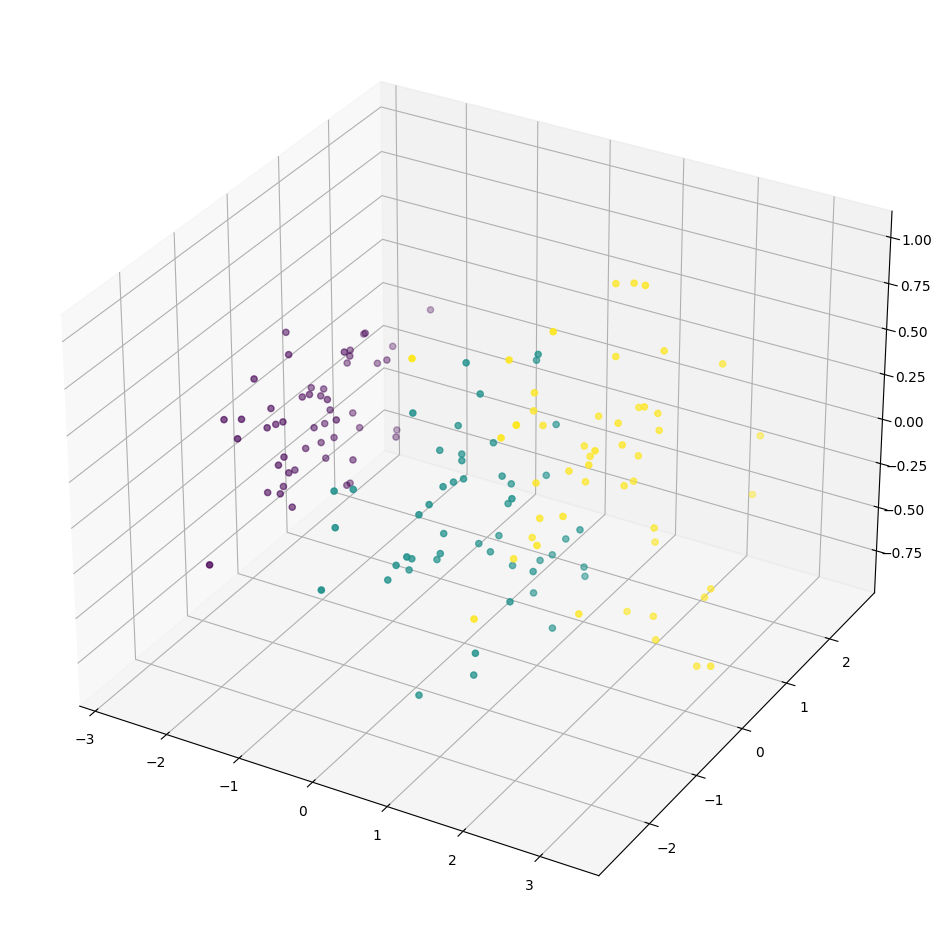

105 45


0.9111111111111111

In [7]:

X, y = load_iris(return_X_y=True) # X: (150, 4)

def perform_PCA(data_norm):
    # perform PCA using sklearn PCA implementation
    pca = PCA(n_components=3, random_state=2)
    pca.fit(data_norm)
    reduced_X = pca.transform(data_norm)
    print(reduced_X.shape)
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(reduced_X[:, 0], reduced_X[:, 1], reduced_X[:, 2],c=y)
    plt.show()
    return pca, reduced_X


# normalize our data via formula
data_norm = (X-X.mean(axis=0)) / X.std(axis=0)
pca, reduced_X = perform_PCA(data_norm)
X_train, X_test, y_train, y_test = train_test_split(reduced_X[:, :2], y, test_size=0.3, random_state=2) # 0 # 2
print(len(X_train), len(X_test))
clf = LogisticRegression(random_state=0, solver="sag").fit(X_train, y_train) 
clf.score(X_test, y_test)

Q4: Apply L1 or L2 regulariser on the logistic regression model developed using the same train and test data used in Q3 and 
calculate performance of the new model. 
Compare performance of this model with the performance reported in Q3. 
Explain the outcome.

In [9]:

clf = LogisticRegression(random_state=0, solver="sag", penalty='l2', ).fit(X_train, y_train) 
clf.score(X_test, y_test)


0.9111111111111111

In [20]:
clf = LogisticRegression(random_state=0, solver="sag", penalty='l2', ).fit(X_train, y_train) 
clf.score(X_test, y_test)

0.9111111111111111